In [1]:
import pandas as pd

Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Наша работа будет включать в себя 6 пунктов:
- предобработка данных
- исследовательский анализ
- объединения данных, так как данные расположены в нескольких таблицах
- подсчет выручки
- проверка гипотез
- доп исследования

#### Шаг 1. Загрузка данных

- [x] 1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:

    /datasets/users_go.csv
    
    /datasets/rides_go.csv
    
    /datasets/subscriptions_go.csv

- [x] 1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


В датафрейме `users` представлены данные о пользователе:
- id
- имя
- возраст
- город
- тип подписки

In [4]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


В датафрейме `rides` представлены данные о заказах:
- id
- расстояние выполненное в заказе
- длительность заказа, предположительно в минутах(посмотрел в теории. да, в минутах)
- дата совершения заказа

In [5]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В датафрейме `subs` представлены данные о типах подписки:
- цена за минуту
- стартовая цена поездки
- цена подписки

**Вывод:**
Структура датафреймов понятна без документации, это очень облегчает работу с этими датасетами.

#### Шаг 2. Предобработка данных

- [x] 2.1 Приведите столбец date к типу даты pandas.
- [x] 2.2 Создайте новый столбец с номером месяца на основе столбца date.
- [x] 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

##### Приведем столбец date к пандасному типу в датасете rides.
Кроме того, просто проверим все датафреймы на предмет некорректных типов данных.

In [6]:
users.dtypes

user_id               int64
name                 object
age                   int64
city                 object
subscription_type    object
dtype: object

In [7]:
rides.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

In [8]:
subs.dtypes

subscription_type    object
minute_price          int64
start_ride_price      int64
subscription_fee      int64
dtype: object

С остальными типами данных все в порядке, поменяем тип данных у date.

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [10]:
rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

##### новый столбец с номером месяца на основе столбца date

In [11]:
rides['month'] = rides['date'].dt.month

In [12]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Столбец с номером месяца успешно добавился

<AxesSubplot:ylabel='Frequency'>

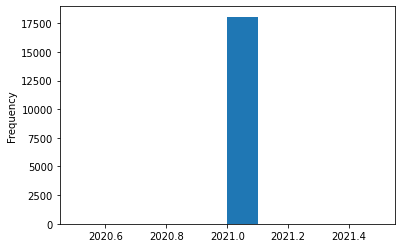

In [13]:
rides['date'].dt.year.plot(kind='hist')

In [14]:
rides['date'].dt.year.max()

2021

In [15]:
rides['date'].dt.year.min()

2021

По графику видно, что в датасете находятся данные только за один код

#####  Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [16]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [18]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в таблицах не обнаружено!

Проверим на наличие явных дубликатов

In [19]:
users.duplicated().sum()

31

In [20]:
users = users.drop_duplicates()

In [21]:
users.duplicated().sum()

0

In [22]:
rides.duplicated().sum()

0

Отлично, избавились от явных дубликатов

In [23]:
# проверяем, что нет повторных индексов, а если их нет, значит больше нет и дубликатов.
(users['user_id'].value_counts() > 1).sum()

0

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
- [x] 3.1 частота встречаемости городов;
- [x] 3.2 соотношение пользователей с подпиской и без подписки;
- [x] 3.3 возраст пользователей;
- [x] 3.4 расстояние, которое пользователь преодолел за одну поездку;
- [x] 3.5 продолжительность поездок.

##### частота встречаемости городов;

<AxesSubplot:title={'center':'Частота встречаемости городов'}>

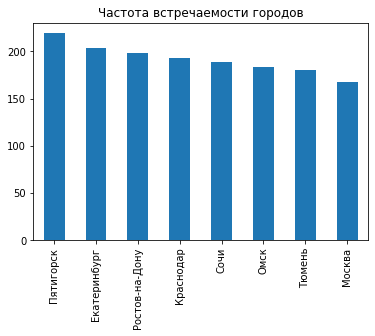

In [24]:
users['city'].value_counts().plot(kind='bar',title='Частота встречаемости городов')

Самое большое количество пользователей в Пятигорске, наименьшее в Москве. 

In [25]:
print(f"Разница в количестве между максимальным количество и минимальным = {users['city'].value_counts().max()-users['city'].value_counts().min()}")

Разница в количестве между максимальным количество и минимальным = 51


Разница в 51 одного пользователя, что составляет почти 25% от наибольшего города по количесту пользователей. Это много.

##### соотношение пользователей с подпиской и без подписки; 

<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без нее'}>

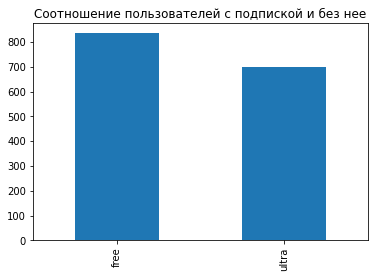

In [26]:
users['subscription_type'].value_counts().plot(kind='bar',title='Соотношение пользователей с подпиской и без нее')

In [27]:
users['subscription_type'].value_counts().max()/users['subscription_type'].value_counts().min()

1.1945636623748213

Пользователей без подписки более чем на 100 человек больше, то есть почти на 20%

#####  возраст пользователей

<AxesSubplot:title={'center':'Распределение возраста пользователей'}, ylabel='Frequency'>

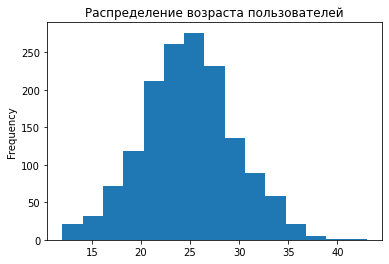

In [28]:
users['age'].plot(kind='hist',bins=15, title='Распределение возраста пользователей' )

In [29]:
display(users['age'].median(), users['age'].mean())

25.0

24.903520208604956

In [30]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Среднее и медиана имеет примерно одинаковое значение. Странно, что минимальный возраст пользователя составляет всего 12 лет, возможно это какая-то аномалия.

##### расстояние, которое пользователь преодолел за одну поездку;

<AxesSubplot:title={'center':'Распределение дистанций поездок'}, ylabel='Frequency'>

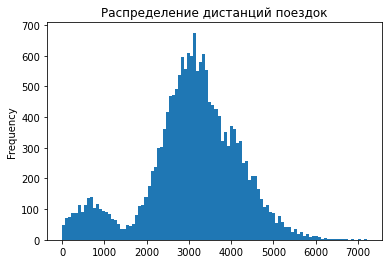

In [31]:
rides['distance'].plot(kind='hist', xlabel='Расстояние', title='Распределение дистанций поездок',bins=100)

По графику видно, что у нас есть два пика, на значении 750 метров и 3500 метров. 
Скорее всего такая картина вырисовывается например из-за того, что Москва имеет очень большие расстояния, а например Ростов-на-Дону - маленькие, поэтому такая картина имеет место быть.

##### продолжительность поездок

In [32]:
rides.columns

Index(['user_id', 'distance', 'duration', 'date', 'month'], dtype='object')

<AxesSubplot:title={'center':'Распределение времени поездок'}, ylabel='Frequency'>

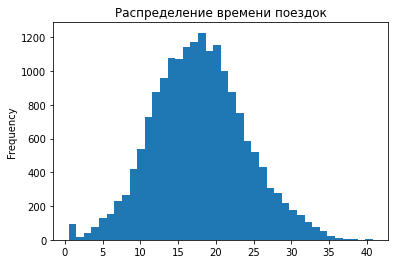

In [33]:
rides['duration'].plot(kind='hist',bins=40, title='Распределение времени поездок')

По графику видно, что большинство поездок длятся 10-25 минут. Логично предположить, что расстояния в городах такие, что человеку не нужно тратить больше времени.   

<AxesSubplot:title={'center':'Распределение времени поездок'}>

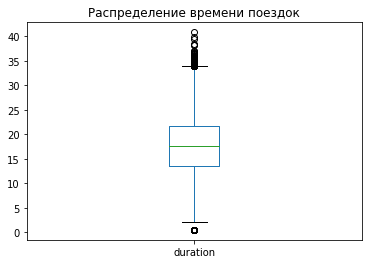

In [34]:
rides['duration'].plot(kind='box', title='Распределение времени поездок')

boxplot подтверждает утверждение о том, что большинство значений лежат в интервале 10-25 минут. График показывает, что от 12.5 до 22.5 находятся 50% значений.

#### Шаг 4. Объединение данных

- [x] 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
- [x] 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

    - c данными о пользователях без подписки;
    - с данными о пользователях с подпиской.

- [x] 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge(). 

In [35]:
data_buf = users.merge(subs, how='outer', on='subscription_type')

In [36]:
print(users.shape[0], subs.shape[0], data_buf.shape[0])

1534 2 1534


Все как и должно быть, так как у каждого значения таблицы users есть соответствующее значение subscripiton_type, значит количество строк в новой таблице ничего и не должно поменяться.

In [37]:
data = data_buf.merge(rides, how='outer', on='user_id')
data.head(5)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8


In [38]:
print(data_buf.shape[0], rides.shape[0], data.shape[0])

1534 18068 18068


все верно, для каждого значения в табоице rides, должно быть соответствующее значение в data_buf, так как не может быть поездки у пользователя, который не зарегистрирован.

##### Создайте ещё два датафрейма из датафрейма

In [39]:
users_sub = data.loc[data['subscription_type']=='ultra']
users_sub.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8


In [40]:
users_no_sub = data.loc[data['subscription_type']=='free']
users_no_sub.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2


#####  Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Сделаем визуализацию сначала для тех, у кого нет подписки:

<AxesSubplot:title={'center':'distance no_sub'}, xlabel='Дистанция в метрах без подписки', ylabel='Frequency'>

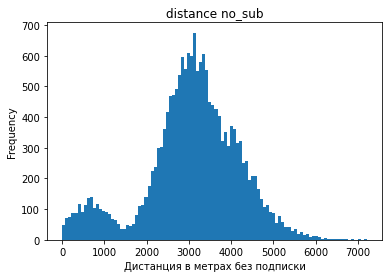

In [41]:
import matplotlib.pyplot as plt
plt.xlabel('Дистанция в метрах без подписки')
data['distance'].plot(kind='hist',bins=100,title='distance no_sub')

<AxesSubplot:title={'center':'duration no_sub'}, xlabel='Длительность поездки в миннутах юез подписки', ylabel='Frequency'>

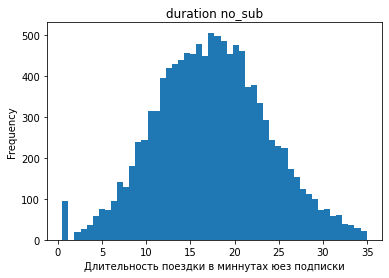

In [42]:
plt.xlabel('Длительность поездки в миннутах юез подписки')
users_no_sub['duration'].plot(kind='hist',bins=50, title='duration no_sub')

Есть подписка:

<AxesSubplot:title={'center':'distance sub'}, xlabel='Дистанция в метрах с подпиской', ylabel='Frequency'>

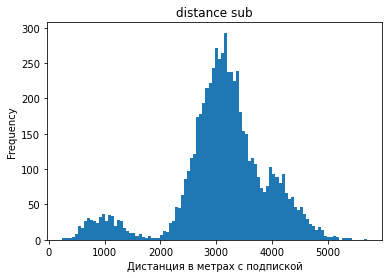

In [43]:
plt.xlabel('Дистанция в метрах с подпиской')
users_sub['distance'].plot(kind='hist',bins=100, title='distance sub')

<AxesSubplot:title={'center':'duration sub'}, xlabel='Длительность в минутах с подпиской', ylabel='Frequency'>

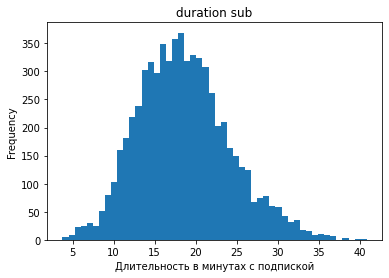

In [44]:
plt.xlabel('Длительность в минутах с подпиской')
users_sub['duration'].plot(kind='hist',bins=50, title='duration sub')

Сравним графики дальности поездки: пользователи без подписки чаще всего проезжают 2-4км, с подпиской обычно проезжают 3-3.5км.

Сравним графики длительности поездки: пользователи без подписки чаще всего едут 10-25 минут, с подпиской же 12.5-22.5. Кроме того, пользователи без подписки могут похвастаться большими объемами поездок. 

#### Шаг 5. Подсчёт выручки

- [x] 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- [x] 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [45]:
data['subscription_type'] = data['subscription_type'].apply(lambda x: 1 if x == 'ultra' else 0)


In [46]:
data_users = data.pivot_table(index=['user_id','month'], 
                              values=['distance', 'duration', 'name', 'subscription_type'], 
                              aggfunc=
                              {
                                  'distance':'sum',
                                  'name':'count',
                                  'duration':'sum',
                                  'subscription_type':'mean'
                              })
data_users.head()

distance   duration  name  subscription_type
user_id month                                                 
1       1      7027.511294  41.416640     2                  1
        4       754.159807   6.232113     1                  1
        8      6723.470560  44.776802     2                  1
        10     5809.911100  31.578017     2                  1
        11     7003.499363  53.397424     3                  1

In [47]:
data_users['subscription_type'].unique()

array([1, 0])

In [48]:
import numpy as np

data_users['duration'] = np.ceil(data_users['duration'])
data_users.head()


distance  duration  name  subscription_type
user_id month                                                
1       1      7027.511294      42.0     2                  1
        4       754.159807       7.0     1                  1
        8      6723.470560      45.0     2                  1
        10     5809.911100      32.0     2                  1
        11     7003.499363      54.0     3                  1

In [49]:
data_users.columns= ['distance', 'duration', 'count', 'subscription_type']

In [50]:
#data_users.columns

In [51]:
data_users['income'] = 8*data_users['duration'] + 50*data_users['count'] + data_users['subscription_type']*(-2*data_users['duration']-50*data_users['count']+199)
data_users.head()

distance  duration  count  subscription_type  income
user_id month                                                         
1       1      7027.511294      42.0      2                  1   451.0
        4       754.159807       7.0      1                  1   241.0
        8      6723.470560      45.0      2                  1   469.0
        10     5809.911100      32.0      2                  1   391.0
        11     7003.499363      54.0      3                  1   523.0

Получается обычный пользователь приносит компании 300-400р в месяц

#### Шаг 6. Проверка гипотез

- [x] 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- [x] 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- [x] 6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- [x] 6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

##### тратят ли пользователи с подпиской больше времени на поездки?

In [53]:
import scipy.stats as st

Н0 - нулевая гипотеза

H0: Пусть подписчики тратят времени столько же или меньше, чем не подписчики

Альтернативаня:  подписчики тратят времени больше, чем не подписчики

In [54]:
users_no_sub['duration'].var()/users_sub['duration'].var()

1.2892550916177028

In [55]:
st.ttest_ind(users_sub['duration'], users_no_sub['duration'], alternative='greater',equal_var=True)

Ttest_indResult(statistic=12.241203729044017, pvalue=1.2804098316645618e-34)

p-value крайне мало, оно даже записано в экспоненциальной форме, следовательно мы можем отвергнуть нулевую гипотезу на любом уровне значимости. И принять альтернативную, что платные подписчики больше времени тратят на поездки.

При этом, при обоих вариантах с одинаковыми диспресиями и разными, p-value крайне мало.

##### расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Н0 - нулевая гипотеза

H0: Пусть люди с подпиской проезжают 3130 или больше метров за одну поездку

Альтернативная: люди с подпиской проезжают менее 3130  метров за одну поездку

In [56]:
st.ttest_1samp(users_sub['distance'], popmean=3130, alternative='less')

Ttest_1sampResult(statistic=-1.402123166869486, pvalue=0.08046311521502146)

p-value примерно равно 8%, что говорит, что мы не можем отвергнуть нулевую гипотезу на уровнях 5% и 1%, но если нас интересует уровень статистической значимости в 10%, то в этом случае нулевую гипотезу можно отвергнуть.

В данном случае, считаю, что 10% слишком большой уровень, поэтому не можем отвергнуть нулевую гипотезу

##### будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

H0 - нулевая гипотеза

H0: выручка от пользователей с подпиской по месяцам меньше, чем выручка от пользователей без подписки

Альтернативная: выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [57]:
data_users['subscription_type'].unique()


array([1, 0])

In [58]:
data_users.loc[data_users['subscription_type']==0,'income'].var()/data_users.loc[data_users['subscription_type']==1,'income'].var()

4.365184072587199

In [59]:
data_users.loc[data_users['subscription_type']==0,'income'].mean()

325.84289496910856

In [60]:
data_users.loc[data_users['subscription_type']==1,'income'].mean()

361.48180013236265

In [61]:
st.ttest_ind(data_users.loc[data_users['subscription_type']==1,'income'],
              data_users.loc[data_users['subscription_type']==0,'income'],
              alternative='greater',
             equal_var=False
              )

Ttest_indResult(statistic=14.04341703675686, pvalue=1.0718729651261336e-44)



p-value крайне мало, поэтому мы можем отвергнуть нулевую гипотезу в пользу альтернативной.

Следовательно, мы можем утверждать, что платные пользователи приносят больше прибыли в месяц.

##### какой тест надо использовать? 

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Сразу бросается в глаза, что здесь у нас есть зависимость данных, то есть у нас есть данные для каждого пользователя до и после обновления. Значит, надо использовать метод `st.ttest_rel()`

---

**Вывод:**

Платные подписчики траятя времени больше на поездки, но и приносят больше месячной прибыли.

Значит компания с полной увереностью может стремиться к тому, чтобы повысить количество платных пользователей.

#### Шаг 7. Распределения

- [x] 7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.
Подсказка
- [x] 7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

##### 

Аппроксимируем биномиальное распределение нормальным

In [63]:
from math import sqrt
from scipy import stats as st

# задаём параметры биномиального распределения
n=1100
result= 1
while result >0.05:
    n +=1
    p = 0.1

    # задаём параметры нормального распределения равными
    # мат.ожиданию и дисперсии биномиального распределения
    mu = n * p
    sigma = sqrt(n * p * (1 - p))

    # задаём нормальное распределение
    distr = st.norm(mu, sigma) 

    # считаем вероятность хвоста слева 
    result = distr.cdf(100)
    #print(f'n:{n},Вероятность не получить 100 подписчиков: {result}')
    
print(n,'- стольким нужно разослать промокод, чтобы получить 100 подписчиков, которые продлят подписку, чтобы вероятность неуспеха была всего 5%')

1169 - стольким нужно разослать промокод, чтобы получить 100 подписчиков, которые продлят подписку, чтобы вероятность неуспеха была всего 5%


Text(0.5, 1.0, 'Апроксимация')

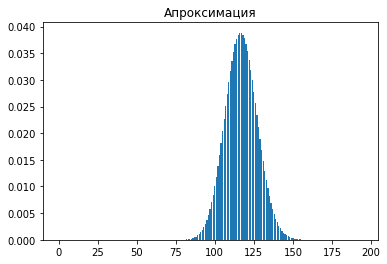

In [64]:
from matplotlib import pyplot as plt
from math import factorial
# количество попыток n
p = 0.1 # вероятность успеха

distr = []

for k in range(0, (n + 1)//6):
    choose = factorial(n) //factorial(n - k)// factorial(k)
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, (n + 1)//6), distr)
plt.title('Апроксимация')

Для построения этого графика были использованы костыли, я бы хотел понимать как сделать это лучше сделать. 

Получается, чтобы получить 100 подписчиков, которые продлят подписку после бесплатного месяца, с вероятностью неуспеха 5%, нужно разослать промокод 1169 людям.

##### 

Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей

In [65]:
from math import sqrt
from scipy import stats as st

# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 43 тысяч
result = distr.cdf(399500)
print(result)

0.15371708296369768


In [66]:
# from matplotlib import pyplot as plt
# from math import factorial
# # количество попыток n
# p = 0.4 # вероятность успеха

# distr = st.norm(mu, sigma) 
# plt.plot(distr)
# # print(distr)

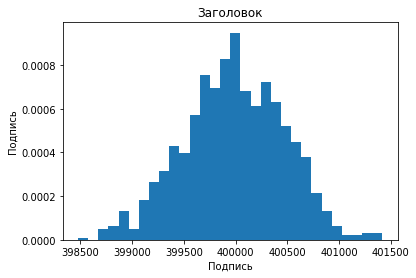

In [68]:
n = 1000000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))
s = np.random.normal(mu, sigma, 1000)

distr = st.norm(mu, sigma) 

plt.hist(s, 30, density=True)
plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись');

Короче не получается график построить): Потому что через другой способо когда считаем для каждого значения у меня так и не посчиталось.

Ответ такой: вероятность получить менее 399.5к открывших клиентов 15.3%

#### Итог работы

Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Мы проанализировали данные и проверили некоторые гипотезы, которые могут помочь бизнесу вырасти.

Какие выводы из этого можно сделать:
- пользователи с подпиской тратя больше времени в поездках
- пользователи проезжают около 3130м, или меньше, зависит от того какой уровень статистической значимости нас устраивает, 
- Платные пользователи траятя больше денег на поездки и приносят больше прибыли



Итого, бизнесу следует искать возможность увеличить платных подписчиков, так как они приносят больше прибыль, проезжают около 3130м, что еще не критично для самих самокатов, поэтому нужно пытаться сподвигнуть пользователей к переходу на платные подписки!

Рекомендации:
- Для этого можно ввести какую-то реферальную систему, по типу пригласи друга и получите скидку на первый месяц или первый месяцц бесплатно. 
- Кроме того, можно добавить какие-то интересные функции для обоих типов подписок, только у платных их количество будет больше. 
- Еще одна рекомендация, сейчас очень быстро развивается тема геймификации, можно придумать какую-то функцию, итогом которой будет бесплатный пробный пертод подписки. Можно сделать какие-то задание, например, проедь 3км и получи 10 монет, проедь 6 км и получи 25 монет. Монеты можно будет потратить на покупку подписки или еще чего-то.
